# PyBrain: A Study in Futility 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

## Proposal

### Background and Purpose

For this project, we are going to tap one of the latest sources of data mining and machine learning. Though not an altogether new endeavor, with the vast increase in computational power, neural networks have surged to the forefront of machine learning. The project proposed here will explore these concepts in a simplistic and focused design to further understanding of the underlying concepts. Our main goal will be to take a relatively straight-forward dataset -Movie Ratings- and apply PyBrain to determine some underlying pattern. 


### Data Source and Collection: 

Our data set comes from GroupLens, and consists of 100,000 movie ratings from 1000 users on 1700 different movies. The dataset predates 1998. (Gotta love the 90’s). The data that we will use primarily focus on the user info such as gender, age and occupation and compare it to movie info such as genre and movie rating. The dataset is primarily numeric which suits our needs perfectly, however, some of the data requires transformation into numeric.  


### Analysis: 

Our analysis will be done primarily in PyBrain, a relatively simplistic neural network package. With relatively few lines of code, PyBrain can take the “training” group and “learn” from it, and then apply that” knowledge” to a test group. For our purposes here, we mean to draw a larger training group and propose that at least 80,000 movie ratings to train PyBrain and 20,000 be tested to see how accurate the neural network will be. 

## Project

### Objective

The objective of this project was to take a machine learning application, specifically PyBrain, and train it to do a certain function. Our original intention of the project was to use lyric data to predict a lyric title. Unfortunately, due to circumstances outside my control (please refer to the README section located in the "Scraped Data" of the github for further explanation), I was forced to reevaluate my data source. This lead me to find the current collection of data that suits Pybrain functionality quite well. The object of this project was to create a "reverse recommender system." Our data source contains ratings from 100,000 reviews, each connected with Genre data. By taking the Genre and the Rating of each of these as an input, we feed the data into Pybrain with our "target" data being the reviewers "Age, Gender, and Occupation". Our hopes here would be that by feeding the neural network with these inputs, we can create a potential model to determine the likely consumers of the various movie genre's.  

### Data Acquistion and Transformation  

Our data acquistion was fairly simple the dataset we found was a CSV. The majority of the processing was done in python, and can be seen in the "Data_Movie_Ratings.py" file. Our data sources had 3 main files that were utilized. The first was the main data file. In this file, we had the movie_id, user_id and the rating. The second file contains the user info, including gender, age and occupation. The third and final file contains movie info, such as the genre. Those are the key things we will be using to train our neural network. Using pandas, we merged with left hand joins, utilizing Movie_ID and User_ID as keys. After the transformation, the data was cleaned, columns were removed and the occupation and gender were made into numeric via mapping.   

### PyBrain Data Processing

The PyBrain Processing can be seen in the "Pybrain_train.py" and the "Pybrain_test.py" files. It was modelled after Zygmunt article referenced below. The PyBrain documentation was very limited, but the article explained the process much more thoroughly then the documentation. What wasn't explained in the code, is the time required for training. After 10 hours, I was able to train 300 epochs before my computer crashed. The first attempt we included the "movie_id" as one of the inputs... This was a bad idea. I figured the data may converge, and I let the code run all night however, there was NO convergence whatsoever. Furthermore, in the first training, I realize that Numpy autoloaded the generic tag for position (1-100,000). This resulted in a poor final product after 9 hours (in fact, all it produced was one IDENTICAL number for allthe  

### Results

The following data highlights the results obtained and what we can do moving forward. Unfortunately, one of the things I was unable to save was the Root Mean Square Error from each epoch. The code produces the information in the console, however, in my haste I didn't save the data. I looked into the documentation to see if the data is saved in the final model, however, I was unable to find it.  

#### Loading Final Data

In [123]:
pred = np.loadtxt("data_out/pred3")
test = np.loadtxt("data_out/test3.csv")
f = open("data/u.occupation")
text = csv.reader(f, delimiter = "\t")
job = list(text)

In [124]:
test_pd = pd.DataFrame(test, columns = ["Num", "Rating","Action","Adventure",
                                        "Animation","Child","Comedy","Crime",
                                        "Doc","Drama","Fantasy","Film-Noir",
                                        "Horror","Musical","Mystery","Romance",
                                        "Sci-Fi", "Thriller","War", "Western",
                                        "age","gender","occupation"])
pred_pd = pd.DataFrame(pred, columns = ["age_1","gender_1","occupation_1"])

In [125]:
drop = ["Num","Action","Adventure",
         "Animation","Child","Comedy","Crime",
         "Doc","Drama","Fantasy","Film-Noir",
         "Horror","Musical","Mystery","Romance",
         "Sci-Fi", "Thriller","War", "Western"]
                                        

In [126]:
total_pd = pd.concat([test_pd,pred_pd],axis=1)

In [127]:
vis_pd = total_pd.drop(drop,1)

#### Showing a summary of the final data after 10 hours of training

In [128]:
vis_pd.head()

,Rating,age,gender,occupation,age_1,gender_1,occupation_1
0,5,68,0,15,32.903816,0.322394,10.672951
1,3,25,0,13,30.191961,0.158716,12.438185
2,3,44,0,0,32.440927,0.169778,11.771967
3,4,42,0,14,35.010478,0.267786,10.415512
4,4,51,0,6,33.435045,0.270445,10.531885


#### Visualization of the Data:Specifically Gender and Occupation

In [129]:
gender = vis_pd.drop(["gender","Rating", "age","occupation","age_1","occupation_1"],1)
gender['X'] = pd.Series(total_pd["gender"])


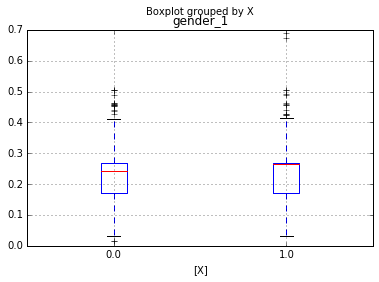

In [130]:
%matplotlib inline
plt.figure()
bp = gender.boxplot(by='X')

In [131]:
jobs = vis_pd.drop(["gender","Rating", "age","occupation","age_1","gender_1"],1)
jobs['X'] = pd.Series(total_pd["occupation"])

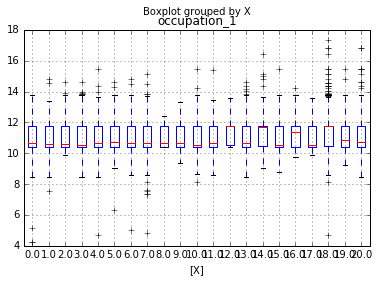

In [132]:
%matplotlib inline
plt.figure()
bp = jobs.boxplot(by='X')

#### Explanation of the data

We plotted box plots to see if there was a general increase of the statistical values over the variables. As the gender was listed as 0, and 1, as Pybrain attempted to predict the gender, the data points for male should be lower towards 0 while females should be higher. However, the data shows that there is only a slightly higher median for females. Looking at the Occupation data you see all of the data have roughly the same issue. Again, each occupation was labelled from 0 to 20(21 total). Theoretically as these values  This should show a linear increase, from 0 to 20. From what little I can see, there maybe a slight increase over the jobs, however, it definitely is not significant. In the end, we need to train the neural network for a lot longer, and there just isn't enought time to do so. 

### Conclusion

As you can see from the data, the training is FAR from complete. As I monitored the training over 350 epochs, the RMSE did decrese, HOWEVER, it decreased SLOWLY. Over the course of the training the RMSE value decreased from 5.56 to 5.40 (a whole .16). As this took roughly 8 hours to train, this results in about .02 error per hour. This results in about 278 hours or 11 days of training (at a constant rate). There are several ways to theoretically decrease the training time. One, would be to limit the dataset 100,000 data points is quite alot to process, however, by limiting the dataset we also decrease the accuracy. Another way to decrease time for a future project would be to remove an output. Specifically age, this output may have resulted in an increase in time of processing. Overall, this project was quite the failure, as explained further in the readme, we had to change our whole process just because we were unable to use lyric data to process code. Pybrain just doesn't process text data (at least I couldn't find a way to do).

### References

Zygmunt Z. "PyBrain - a simple neural networks library in Python" 2014-03-06
http://fastml.com/pybrain-a-simple-neural-networks-library-in-python/

Tom Schaul, Justin Bayer, Daan Wierstra, Sun Yi, Martin Felder, Frank Sehnke, Thomas Rückstieß, Jürgen Schmidhuber. "PyBrain." To appear in: Journal of Machine Learning Research, 2010.
http://pybrain.org/

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets:
History and Context. ACM Transactions on Interactive Intelligent
Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.
http://dx.doi.org/10.1145/2827872
http://grouplens.org/datasets/movielens/